# HW2 
## Yaling Xu


### 1. Import the data and tokenize to use with Keras.

In [1]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Embedding, Flatten, Dense
from keras.models import Sequential


train_df = pd.read_csv('congress_train.csv', encoding='latin-1').dropna()
val_df = pd.read_csv('congress_val.csv', encoding='latin-1').dropna()
test_df = pd.read_csv('congress_test.csv', encoding='latin-1').dropna()

Using TensorFlow backend.


In [2]:
val_text = list(val_df['Title'])
val_text = [str(i) for i in val_text]
val_y = to_categorical(list(val_df['Major']))

train_text = list(train_df['Title'])
train_text = [str(i) for i in train_text]
train_y = to_categorical(list(train_df['Major']))

test_text = list(test_df['Title'])
test_text = [str(i) for i in test_text]
test_y = to_categorical(list(test_df['Major']))

# tokenize the data and keep only the 10000 most frequent words
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_text)
train_seq = tokenizer.texts_to_sequences(train_text)
test_seq = tokenizer.texts_to_sequences(test_text)
val_seq = tokenizer.texts_to_sequences(val_text)

# Limit each bill's title to a maximum length of 100 words
train_x = pad_sequences(train_seq, maxlen=100)
test_x = pad_sequences(test_seq, maxlen=100)
val_x = pad_sequences(val_seq, maxlen=100)

### 3. Estimate a basic feed-forward network

In [3]:
ff = Sequential()
ff.add(Embedding(10000, 30, input_length=100))
ff.add(Flatten())
ff.add(Dense(24, activation='softmax'))
ff.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_ff = ff.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=50, batch_size=512)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 2s 7us/step - loss: 1.7943 - acc: 0.5116 - val_loss: 1.0009 - val_acc: 0.7421
Epoch 2/50
278612/278612 [==============================] - 1s 4us/step - loss: 0.7988 - acc: 0.7893 - val_loss: 0.7146 - val_acc: 0.8092
Epoch 3/50
278612/278612 [==============================] - 1s 4us/step - loss: 0.6353 - acc: 0.8274 - val_loss: 0.6436 - val_acc: 0.8288
Epoch 4/50
278612/278612 [==============================] - 1s 4us/step - loss: 0.5673 - acc: 0.8448 - val_loss: 0.6098 - val_acc: 0.8365
Epoch 5/50
278612/278612 [==============================] - 1s 4us/step - loss: 0.5245 - acc: 0.8553 - val_loss: 0.5963 - val_acc: 0.8391
Epoch 6/50
278612/278612 [==============================] - 1s 4us/step - loss: 0.4929 - acc: 0.8638 - val_loss: 0.5808 - val_acc: 0.8461
E

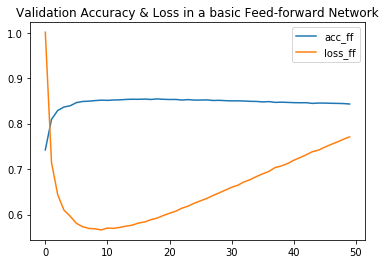

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

acc_ff = result_ff.history['val_acc']
loss_ff = result_ff.history['val_loss']
plt.plot(acc_ff)
plt.plot(loss_ff)

plt.legend(['acc_ff', 'loss_ff'])
plt.title("Validation Accuracy & Loss in a basic Feed-forward Network")
plt.show()

Basically, in this model, the accuracy starts to keep unchanged after 10 epochs while the loss gets worse after about 8 epochs. 

### 4. Estimate a recurrent neural network (RNN) with a layer_simple_rnn

In [5]:
from keras.layers import SimpleRNN
# Use a task-specific embedding layer with an appropriate number of output dimensions (select this yourself)
rnn = Sequential()
rnn.add(Embedding(10000, 30, input_length=100))
rnn.add(SimpleRNN(30))
rnn.add(Dense(24, activation='softmax'))
rnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn = rnn.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 17s 60us/step - loss: 2.2500 - acc: 0.3420 - val_loss: 1.6939 - val_acc: 0.5068
Epoch 2/30
278612/278612 [==============================] - 16s 59us/step - loss: 1.4735 - acc: 0.5900 - val_loss: 1.2785 - val_acc: 0.6540
Epoch 3/30
278612/278612 [==============================] - 17s 60us/step - loss: 1.1394 - acc: 0.7020 - val_loss: 1.0746 - val_acc: 0.7266
Epoch 4/30
278612/278612 [==============================] - 17s 61us/step - loss: 0.9689 - acc: 0.7514 - val_loss: 1.0299 - val_acc: 0.7317
Epoch 5/30
278612/278612 [==============================] - 17s 59us/step - loss: 0.8811 - acc: 0.7754 - val_loss: 0.9370 - val_acc: 0.7555
Epoch 6/30
278612/278612 [==============================] - 17s 60us/step - loss: 0.8246 - acc: 0.7891 - val_loss: 0.8903 - val_acc: 0.7720
Epoch 7/30
278612/278612 [==============================] - 17s 60us/step - loss: 0.7751 - acc: 0.8015 - val_

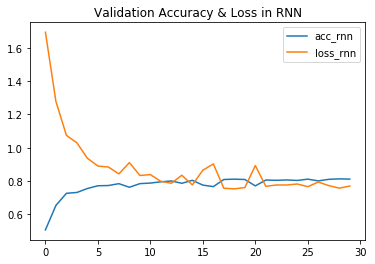

In [6]:
acc_rnn = result_rnn.history['val_acc']
loss_rnn = result_rnn.history['val_loss']
plt.plot(acc_rnn)
plt.plot(loss_rnn)

plt.legend(['acc_rnn', 'loss_rnn'])
plt.title("Validation Accuracy & Loss in RNN")
plt.show()

Similarly, the accuracy starts to keep unchanged after 10 epochs while the loss gets worse after about 8 epochs. We will use 15 epochs for the following analysis. 

### 5. Estimate an RNN with an LSTM layer

In [7]:
from keras.layers import LSTM

lstm = Sequential()
lstm.add(Embedding(10000, 30, input_length=100))
lstm.add(LSTM(30))
lstm.add(Dense(24, activation='softmax'))
lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_lstm = lstm.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 45s 160us/step - loss: 2.1515 - acc: 0.3818 - val_loss: 1.5776 - val_acc: 0.5721
Epoch 2/30
278612/278612 [==============================] - 45s 162us/step - loss: 1.2212 - acc: 0.6820 - val_loss: 1.0191 - val_acc: 0.7384
Epoch 3/30
278612/278612 [==============================] - 45s 161us/step - loss: 0.8988 - acc: 0.7689 - val_loss: 0.8426 - val_acc: 0.7852
Epoch 4/30
278612/278612 [==============================] - 45s 161us/step - loss: 0.7557 - acc: 0.8080 - val_loss: 0.8096 - val_acc: 0.7901
Epoch 5/30
278612/278612 [==============================] - 45s 160us/step - loss: 0.6776 - acc: 0.8264 - val_loss: 0.7143 - val_acc: 0.8150
Epoch 6/30
278612/278612 [==============================] - 45s 162us/step - loss: 0.6281 - acc: 0.8368 - val_loss: 0.6859 - val_acc: 0.8211
Epoch 7/30
278612/278612 [==============================] - 46s 163us/step - loss: 0.5920 - acc: 0.8440

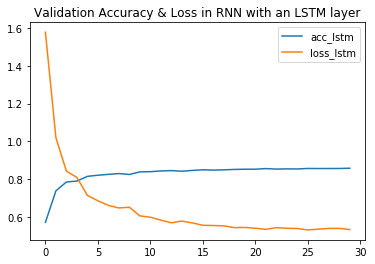

In [8]:
acc_lstm = result_lstm.history['val_acc']
loss_lstm = result_lstm.history['val_loss']
plt.plot(acc_lstm)
plt.plot(loss_lstm)

plt.legend(['acc_lstm', 'loss_lstm'])
plt.title("Validation Accuracy & Loss in RNN with an LSTM layer")
plt.show()

The accuracy starts to keep unchanged after 5 epochs.

### 6. Estimate an RNN with a GRU layer

In [9]:
from keras.layers import GRU

gru = Sequential()
gru.add(Embedding(10000, 30, input_length=100))
gru.add(GRU(30))
gru.add(Dense(24, activation='softmax'))
gru.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_gru = gru.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 36s 131us/step - loss: 2.3908 - acc: 0.2852 - val_loss: 1.8330 - val_acc: 0.4854
Epoch 2/30
278612/278612 [==============================] - 36s 129us/step - loss: 1.4307 - acc: 0.6246 - val_loss: 1.1464 - val_acc: 0.7086
Epoch 3/30
278612/278612 [==============================] - 36s 129us/step - loss: 0.9786 - acc: 0.7511 - val_loss: 0.9026 - val_acc: 0.7709
Epoch 4/30
278612/278612 [==============================] - 36s 129us/step - loss: 0.7741 - acc: 0.8037 - val_loss: 0.7534 - val_acc: 0.8092
Epoch 5/30
278612/278612 [==============================] - 36s 129us/step - loss: 0.6733 - acc: 0.8262 - val_loss: 0.6868 - val_acc: 0.8221
Epoch 6/30
278612/278612 [==============================] - 36s 129us/step - loss: 0.6141 - acc: 0.8372 - val_loss: 0.6648 - val_acc: 0.8237
Epoch 7/30
278612/278612 [==============================] - 36s 129us/step - loss: 0.5736 - acc: 0.8466

### 7. Estimate five additional neural network models with different configurations of hyperparameters (e.g. number of layers, number of hidden units, dropout, weight regularization, pre-trained word embeddings)

In [10]:
# rnn model for two layers
rnn2 = Sequential()
rnn2.add(Embedding(10000, 30, input_length=100))
rnn2.add(SimpleRNN(30, return_sequences=True))
rnn2.add(SimpleRNN(30))
rnn2.add(Dense(24, activation='softmax'))
rnn2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn2 = rnn2.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 32s 115us/step - loss: 1.9682 - acc: 0.4347 - val_loss: 1.4841 - val_acc: 0.5937
Epoch 2/30
278612/278612 [==============================] - 31s 112us/step - loss: 1.2227 - acc: 0.6799 - val_loss: 1.1016 - val_acc: 0.7162
Epoch 3/30
278612/278612 [==============================] - 32s 114us/step - loss: 0.9704 - acc: 0.7496 - val_loss: 0.9339 - val_acc: 0.7624
Epoch 4/30
278612/278612 [==============================] - 32s 115us/step - loss: 0.8419 - acc: 0.7837 - val_loss: 0.8893 - val_acc: 0.7732
Epoch 5/30
278612/278612 [==============================] - 32s 115us/step - loss: 0.7757 - acc: 0.8005 - val_loss: 0.8307 - val_acc: 0.7880
Epoch 6/30
278612/278612 [==============================] - 31s 112us/step - loss: 0.7185 - acc: 0.8147 - val_loss: 0.9204 - val_acc: 0.7541
Epoch 7/30
278612/278612 [==============================] - 31s 110us/step - loss: 0.6753 - acc: 0.8248

In [11]:
#rnn drop model for dropout rate = 0.2 
rnn_drop = Sequential()
rnn_drop.add(Embedding(10000, 20, input_length=100))
rnn_drop.add(SimpleRNN(20, dropout=0.2))
rnn_drop.add(Dense(24, activation='softmax'))
rnn_drop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn_drop = rnn_drop.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=512)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 18s 65us/step - loss: 2.3768 - acc: 0.2800 - val_loss: 1.9034 - val_acc: 0.4341
Epoch 2/30
278612/278612 [==============================] - 18s 64us/step - loss: 1.6872 - acc: 0.5065 - val_loss: 1.5009 - val_acc: 0.5651
Epoch 3/30
278612/278612 [==============================] - 18s 63us/step - loss: 1.3656 - acc: 0.6205 - val_loss: 1.2519 - val_acc: 0.6687
Epoch 4/30
278612/278612 [==============================] - 17s 63us/step - loss: 1.1966 - acc: 0.6811 - val_loss: 1.1186 - val_acc: 0.7090
Epoch 5/30
278612/278612 [==============================] - 18s 64us/step - loss: 1.0866 - acc: 0.7151 - val_loss: 1.0340 - val_acc: 0.7338
Epoch 6/30
278612/278612 [==============================] - 17s 63us/step - loss: 1.0066 - acc: 0.7387 - val_loss: 0.9974 - val_acc: 0

In [12]:
#rnn drop model for dropout rate = 0.8
rnn_drop2 = Sequential()
rnn_drop2.add(Embedding(10000, 20, input_length=100))
rnn_drop2.add(SimpleRNN(20, dropout=0.8))
rnn_drop2.add(Dense(24, activation='softmax'))
rnn_drop2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn_drop2 = rnn_drop2.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 18s 65us/step - loss: 2.6651 - acc: 0.2006 - val_loss: 2.2589 - val_acc: 0.3131
Epoch 2/30
278612/278612 [==============================] - 18s 63us/step - loss: 2.2703 - acc: 0.2996 - val_loss: 1.9731 - val_acc: 0.3778
Epoch 3/30
278612/278612 [==============================] - 18s 63us/step - loss: 2.1412 - acc: 0.3350 - val_loss: 1.8694 - val_acc: 0.4126
Epoch 4/30
278612/278612 [==============================] - 18s 63us/step - loss: 2.0734 - acc: 0.3584 - val_loss: 1.7767 - val_acc: 0.4628
Epoch 5/30
278612/278612 [==============================] - 18s 63us/step - loss: 2.0269 - acc: 0.3780 - val_loss: 1.7387 - val_acc: 0.4764
Epoch 6/30
278612/278612 [==============================] - 18s 64us/step - loss: 1.9926 - acc: 0.3891 - val_loss: 1.6967 - val_acc: 0.4937
Epoch 7/30
278612/278612 [==============================] - 18s 64us/step - loss: 1.9713 - acc: 0.3980 - val_

In [13]:
#gru model for batch size = 300
gru1 = Sequential()
gru1.add(Embedding(10000, 30, input_length=100))
gru1.add(GRU(30))
gru1.add(Dense(24, activation='softmax'))
gru1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_gru1 = gru1.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=300)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 63s 225us/step - loss: 2.1831 - acc: 0.3469 - val_loss: 1.4955 - val_acc: 0.6118
Epoch 2/30
278612/278612 [==============================] - 62s 224us/step - loss: 1.1538 - acc: 0.7079 - val_loss: 0.9434 - val_acc: 0.7635
Epoch 3/30
278612/278612 [==============================] - 62s 223us/step - loss: 0.8144 - acc: 0.7939 - val_loss: 0.7649 - val_acc: 0.8056
Epoch 4/30
278612/278612 [==============================] - 62s 223us/step - loss: 0.6826 - acc: 0.8230 - val_loss: 0.6758 - val_acc: 0.8232
Epoch 5/30
278612/278612 [==============================] - 62s 223us/step - loss: 0.6121 - acc: 0.8382 - val_loss: 0.6384 - val_acc: 0.8310
Epoch 6/30
278612/278612 [==============================] - 62s 223us/step - loss: 0.5681 - acc: 0.8469 - val_loss: 0.6063 - val_acc: 0.8387
Epoch 7/30
278612/278612 [==============================] - 62s 223us/step - loss: 0.5366 - acc: 0.8534

In [14]:
# lstm model for 10 embedding layer 
lstm2 = Sequential()
lstm2.add(Embedding(10000, 10, input_length=100))
lstm2.add(LSTM(10))
lstm2.add(Dense(24, activation='softmax'))
lstm2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_lstm2 = lstm2.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 45s 163us/step - loss: 2.6223 - acc: 0.2051 - val_loss: 2.2773 - val_acc: 0.3037
Epoch 2/30
278612/278612 [==============================] - 44s 160us/step - loss: 2.0325 - acc: 0.3831 - val_loss: 1.7719 - val_acc: 0.4823
Epoch 3/30
278612/278612 [==============================] - 44s 159us/step - loss: 1.5885 - acc: 0.5483 - val_loss: 1.4713 - val_acc: 0.5907
Epoch 4/30
278612/278612 [==============================] - 44s 159us/step - loss: 1.3441 - acc: 0.6344 - val_loss: 1.2982 - val_acc: 0.6407
Epoch 5/30
278612/278612 [==============================] - 45s 160us/step - loss: 1.1622 - acc: 0.6869 - val_loss: 1.2412 - val_acc: 0.6603
Epoch 6/30
278612/278612 [==============================] - 45s 160us/step - loss: 1.0331 - acc: 0.7288 - val_loss: 1.0333 - val_acc: 0.7354
Epoch 7/30
278612/278612 [==============================] - 45s 160us/step - loss: 0.9371 - acc: 0.7601

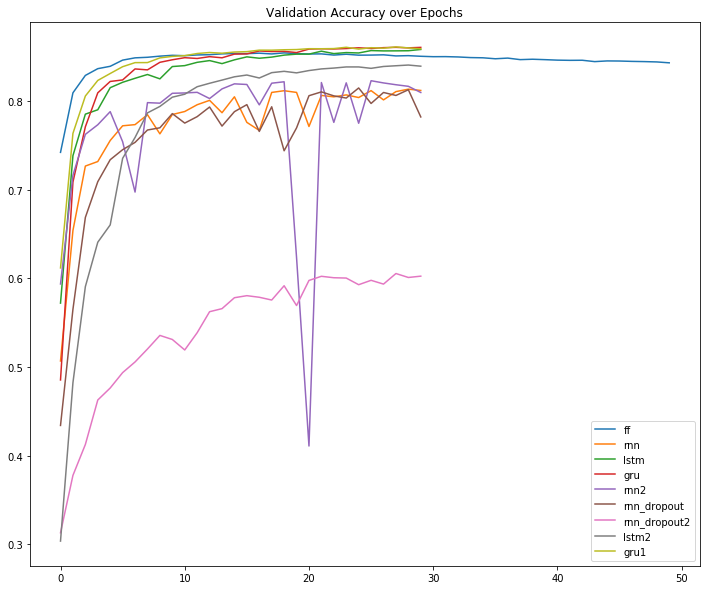

In [17]:
acc_ff = result_ff.history['val_acc']
acc_rnn = result_rnn.history['val_acc']
acc_lstm = result_lstm.history['val_acc']
acc_gru = result_gru.history['val_acc']

acc_rnn2 = result_rnn2.history['val_acc']
acc_rnn_drop = result_rnn_drop.history['val_acc']
acc_rnn_drop2 = result_rnn_drop2.history['val_acc']
acc_lstm2 = result_lstm2.history['val_acc']
acc_gru1 = result_gru1.history['val_acc']

plt.figure(figsize=(12, 10))
plt.plot(acc_ff)
plt.plot(acc_rnn)
plt.plot(acc_lstm)
plt.plot(acc_gru)

plt.plot(acc_rnn2)
plt.plot(acc_rnn_drop)
plt.plot(acc_rnn_drop2)
plt.plot(acc_lstm2)
plt.plot(acc_gru1)
plt.legend(['ff', 'rnn', 'lstm', 'gru', 'rnn2', 'rnn_dropout', 'rnn_dropout2', 'lstm2', 'gru1'])
plt.title('Validation Accuracy over Epochs')
plt.show()

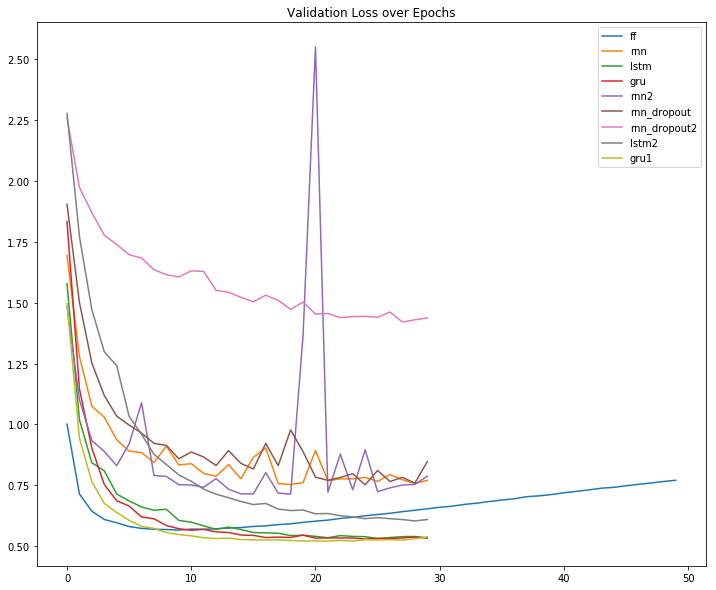

In [18]:
loss_ff = result_ff.history['val_loss']
loss_rnn = result_rnn.history['val_loss']
loss_lstm = result_lstm.history['val_loss']
loss_gru = result_gru.history['val_loss']

loss_rnn2 = result_rnn2.history['val_loss']
loss_rnn_drop = result_rnn_drop.history['val_loss']
loss_rnn_drop2 = result_rnn_drop2.history['val_loss']
loss_lstm2 = result_lstm2.history['val_loss']
loss_gru1 = result_gru1.history['val_loss']

plt.figure(figsize=(12, 10))
plt.plot(loss_ff)
plt.plot(loss_rnn)
plt.plot(loss_lstm)
plt.plot(loss_gru)

plt.plot(loss_rnn2)
plt.plot(loss_rnn_drop)
plt.plot(loss_rnn_drop2)
plt.plot(loss_lstm2)
plt.plot(loss_gru1)
plt.legend(['ff', 'rnn', 'lstm', 'gru', 'rnn2', 'rnn_dropout', 'rnn_dropout2', 'lstm2', 'gru1'])
plt.title('Validation Loss over Epochs')
plt.show()

In [21]:
gru1.evaluate(test_x, test_y)

38693/38693 [==============================] - 26s 661us/step


[0.5453437992791849, 0.8568216473279302]

In [20]:
lstm.evaluate(test_x, test_y)

38693/38693 [==============================] - 31s 791us/step


[0.5337931816084289, 0.8589925826392268]

In [22]:
gru.evaluate(test_x, test_y)

38693/38693 [==============================] - 26s 661us/step


[0.5413824385531982, 0.8588116713632855]

I think the best model is the RNN with an LSTM layer. The test set loss and accuracy is 0.5337931816084289 and 0.8589925826392268 respectively, and it generalizes very well. However, it is worse than hand-coding but I couldn't know whether there exists minimum loss and better performance after very extreme large epochs.